# Lesson 8 - Starter code for guided practice & demos

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

# Config
DATA_DIR = Path('./resources')
np.random.seed(1)

## Slide: "Wager those odds!"

### Guided Practice: Logit Function and Odds

In [2]:
def logit_func(odds):
    return np.log(odds)

def sigmoid_func(logit):
    return 1.0 / (1 + np.exp(-logit) )

odds_set = [
    4./1,   # AlphaGo : Seedol,   4:1
    20./1,  # Chelsea : Leicester City,   20:1
    1.1/1,  # England : Wales,   1.1:1
    7.0/4,  # Brexit : Remain,   7:4
    4.0/11  # President Trump : Not President Trump,   4:11
]

In [3]:
# Print the probability of the (predicted) better team winning in each case above
for i in odds_set:
    print sigmoid_func(logit_func(i))   

0.8
0.952380952381
0.52380952381
0.636363636364
0.266666666667


## Slide: "Logistic regression implementation"
Use the data titanic.csv and the LogisticRegression estimator in sklearn to predict the target variable `survived`.

1. What is the bias, or prior probability, of the dataset?
2. Build a simple model with one feature and explore the coef_ value.  Does this represent the odds or logit (log odds)?
3. Build a more complicated model using multiple features. Interpreting the odds, which features have the most impact on survival? Which features have the least?
4. What is the accuracy of your model?

N.B. `age` will need some work (since it is missing for a significant portion), and other data cleanup simplifies the data problem a little.

In [4]:
titanic = pd.read_csv(DATA_DIR / 'titanic.csv')
titanic['is_male'] = titanic.sex.apply(lambda x: 1 if x == 'male' else 0)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,is_male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
print 'bias / prior probability =',len(titanic[titanic.survived==1]) / float(titanic.survived.count())

bias / prior probability = 0.383838383838


In [6]:
lr = LogisticRegression()
X = titanic[['is_male']]
y = titanic['survived']
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# Find out how to print out the log-reg coefficients, intercept and mean survival rate
print 'coefficients:',lr.coef_
print 'intercept:',lr.intercept_
print 'mean survival:',titanic.survived.mean()

coefficients: [[-2.43010712]]
intercept: [ 1.00027876]
mean survival: 0.383838383838


In [8]:
# Print out the odds for each coefficient
print 'odds ratio - men v women:',np.exp(lr.coef_)
print 'odds ratio - women v men:',1./np.exp(lr.coef_)

odds ratio - men v women: [[ 0.0880274]]
odds ratio - women v men: [[ 11.3600989]]


## Slide: "Evaluating logistic regression with alternative metrics"
This Titanic dataset comes from [Kaggle](https://www.kaggle.com/c/titanic).

Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. For a worst case scenario, identify one or two strong features that would be useful to include in this model.


1. Spend 1-2 minutes considering which metric makes the most sense to optimise. Accuracy? FPR or TPR? AUC? Given the "business problem" of understanding survival rate aboard the Titanic, why should you use this metric?

2. Build a tuned logistic regression model. Be prepared to explain your design (including regularisation), choice of metric, and your chosen feature set in predicting survival using any tools necessary (such as fit charts). Use the starter code to get you going.

N.B. If you haven't done it yet, `age` will need some work (since it is missing for a significant portion), and other data cleanup simplifies the data problem a little.

In [9]:
# Data cleanse

# Fill in age missing values with median value
titanic.age.fillna(value=titanic.age.median(),inplace=True)

# Dummy class column
titanic = titanic.join(pd.get_dummies(titanic.pclass,prefix='pclass'))

# Replace sex column with 1 for male and 0 for female
titanic.sex.replace(('male','female'),value =(1,0),inplace=True)

titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,is_male,pclass_1,pclass_2,pclass_3
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,0.0,0.0,1.0


0.76687278305052264

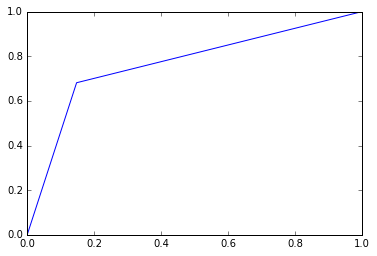

In [10]:
# Base model using sex as only feature
lr = LogisticRegression()
X = titanic[['is_male']]
y = titanic['survived']
lr.fit(X, y)

predictions = lr.predict(X)
probabilities = lr.predict_proba(X)
plt.plot(roc_curve(titanic[['survived']], probabilities[:,1])[0],
         roc_curve(titanic[['survived']], probabilities[:,1])[1])

roc_auc_score(titanic['survived'], lr.predict(X))

0.77782571182053495

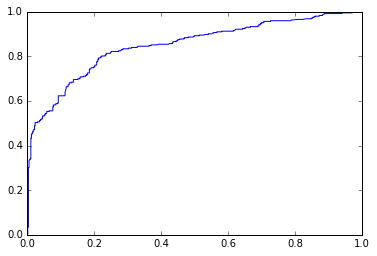

In [11]:
# Add in additional features
X = titanic[['is_male','pclass_2','pclass_3','fare','age']]
lr.fit(X, y)

predictions = lr.predict(X)
probabilities = lr.predict_proba(X)
plt.plot(roc_curve(titanic[['survived']], probabilities[:,1])[0],
         roc_curve(titanic[['survived']], probabilities[:,1])[1])

roc_auc_score(titanic['survived'], lr.predict(X))

Now using gridsearch I will test different regularisation parameters to optimise the model.

Best score
0.83954079187

Best estimator
LogisticRegression(C=1.2589254117941673, class_weight=None, dual=False,
          fit_intercept='True', intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Coefficients
[[ -2.44378593e+00  -7.58975295e-01  -1.90220662e+00   2.39690539e-03
   -2.62542000e-02]]


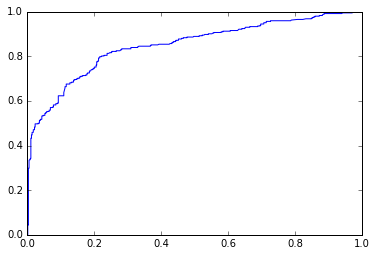

In [30]:
from sklearn import grid_search
X = titanic[['is_male','pclass_2','pclass_3','fare','age']]
y = titanic['survived']
cvalues = np.logspace(0.1,10,num=20)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'penalty': ('l1','l2'),
               'fit_intercept':('True','False'),
               'C':cvalues},
    scoring='roc_auc')

gs.fit(X, y)
print "Best score"
print gs.best_score_
print
print "Best estimator"
print gs.best_estimator_
print
print "Coefficients"
print gs.best_estimator_.coef_

probabilities = gs.best_estimator_.predict_proba(X)
plt.plot(roc_curve(titanic[['survived']], probabilities[:,1])[0],
         roc_curve(titanic[['survived']], probabilities[:,1])[1])